Import the python code files

In [1]:
%run -i biaxial_weave_units.py
%run -i weaving_space_utils.py
%run -i render_weave_grids.py

import geopandas

In [6]:
cell = get_grid_cell_polygon(n_sides=3)

In [7]:
slices = get_grid_cell_slices(W = 0.5, n_slices=5)

<AxesSubplot:>

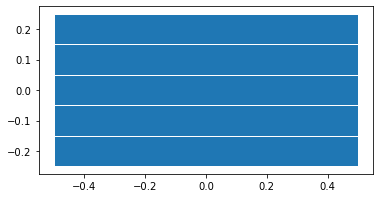

In [8]:
geopandas.GeoSeries(slices).plot(edgecolor = "w")

In [13]:
strands = get_cell_strands(n = 3, width=0.6, n_slices=2, parity=1, orientation=120)
strands

<AxesSubplot:>

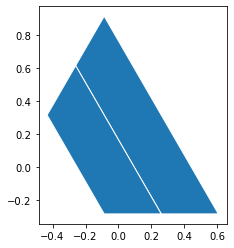

In [14]:
geopandas.GeoSeries(strands).plot(edgecolor = "w")